In [2]:
for i, j in zip(range(10), range(10)):
    print(i,j)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


In [3]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [4]:


# Ensure plots are displayed inline
%matplotlib inline
#%matplotlib notebook



In [5]:
# Read in some data to show some real world exampled
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")

In [6]:
df.head()


,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [7]:
top_10 = (df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})
          .sort_values(by='ext price', ascending=False))[:10].reset_index()
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)

In [8]:
top_10

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


In [10]:
plt.style.available

['seaborn-poster',
 'classic',
 'ggplot',
 'seaborn-muted',
 'seaborn-dark-palette',
 'seaborn-dark',
 'dark_background',
 'seaborn-darkgrid',
 'grayscale',
 'seaborn-colorblind',
 'fivethirtyeight',
 'seaborn-bright',
 'seaborn-white',
 'seaborn-deep',
 'seaborn-ticks',
 'seaborn-pastel',
 'bmh',
 'seaborn-talk',
 'seaborn-paper',
 'seaborn-whitegrid',
 'seaborn-notebook']

In [11]:
plt.style.use('ggplot')

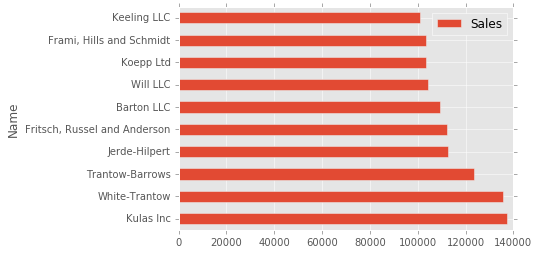

In [12]:
top_10.plot(kind='barh', y='Sales', x='Name')

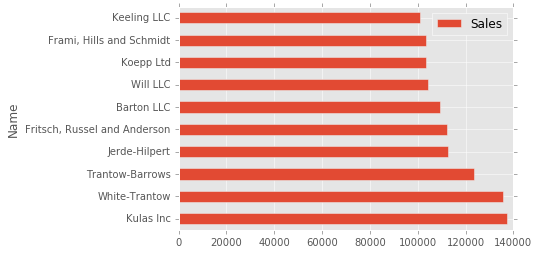

In [13]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y='Sales', x='Name',ax=ax)

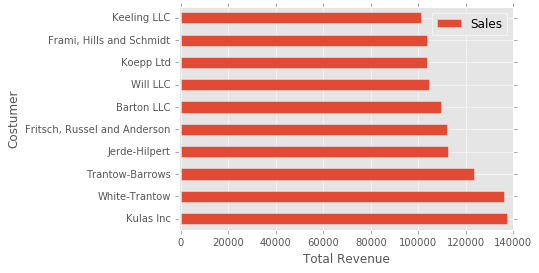

In [15]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y='Sales', x='Name',ax=ax)
ax.set_xlim([-1000, 140000])
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Costumer')

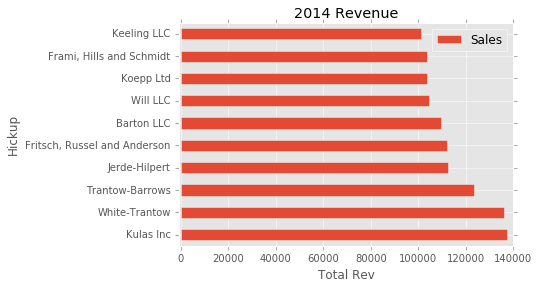

In [17]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y='Sales', x='Name',ax=ax)
ax.set_xlim([-1000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Rev', ylabel="Hickup")

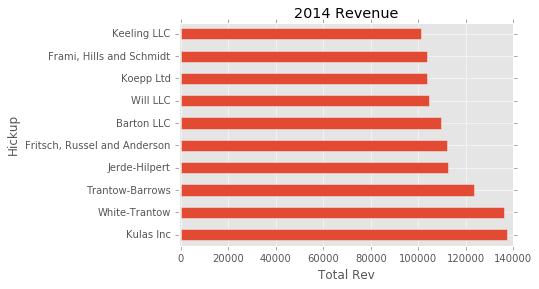

In [18]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y='Sales', x='Name',ax=ax)
ax.set_xlim([-1000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Rev', ylabel="Hickup")
ax.legend().set_visible(False)

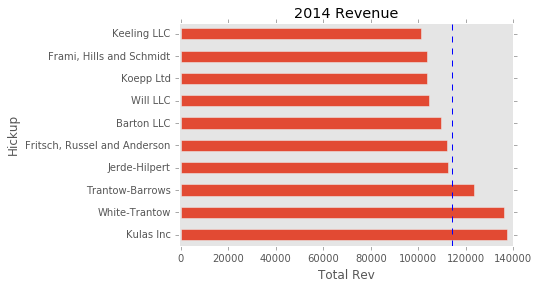

In [20]:
fig, ax = plt.subplots()
avg = top_10["Sales"].mean()
top_10.plot(kind='barh', y='Sales', x='Name',ax=ax)
ax.set_xlim([-1000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Rev', ylabel="Hickup")
ax.legend().set_visible(False)
ax.axvline(x=avg, color ='b', label = 'Average', linestyle='--', linewidth=1)
ax.grid(False)
ax.legend().set_visible(False)

In [32]:
def currency(x, pos):
    ''' The two args are the value and the tick position'''
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

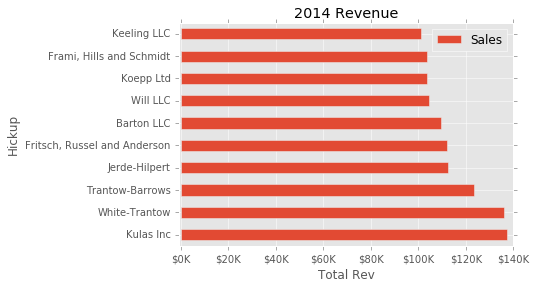

In [33]:
fig, ax = plt.subplots()
avg = top_10["Sales"].mean()
top_10.plot(kind='barh', y='Sales', x='Name',ax=ax)
ax.set_xlim([-1000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Rev', ylabel="Hickup")
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

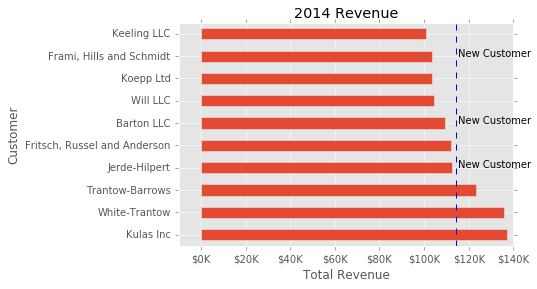

In [26]:
# Create the figure and the axes
fig, ax = plt.subplots()

# Plot the data and get the averaged
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
avg = top_10['Sales'].mean()

# Set limits and labels
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Annotate the new customers
for cust in [3, 5, 8]:
    ax.text(115000, cust, "New Customer")
    
# Format the currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# Hide the legend
ax.legend().set_visible(False);

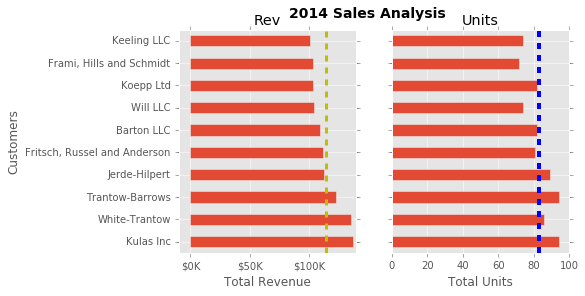

In [55]:
#get more plots
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))
top_10.plot(kind='barh', y='Sales', x='Name', ax=ax0)
ax0.set_xlim([-10000, 140000])
ax0.set(title='Rev', xlabel ='Total Revenue', ylabel='Customers')
avg = top_10.Sales.mean()
ax0.axvline(x=avg, color='y', label='Average', linestyle ='--', linewidth=3)
#ax0.tick_params(axis = 'x', direction='out', length=6, width=2, colors='r')
#keep tick formater in mind func(x, pos): return .formated value
formatter = FuncFormatter(currency)
ax0.xaxis.set_major_formatter(formatter)
ax0.set_xticks([0, 50000, 100000])


# Repeat for the unit plot
top_10.plot(kind='barh', y="Purchases", x="Name", ax=ax1)
avg = top_10['Purchases'].mean()
ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=4)

#Title
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold')

ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

In [48]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

In [49]:
fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")

In [50]:
from IPython.display import Image

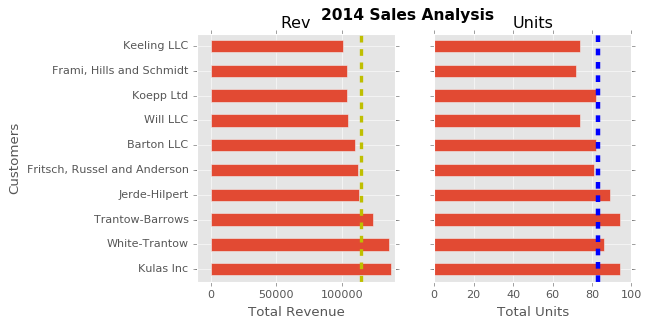

In [51]:
Image('sales.png')